In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [2]:
data_dir = "G:\Shared drives\GEB Potential Study (NREL LBNL)\Measure Savings Shapes\Residential Measures\Run3"
files = os.listdir(data_dir)
files

['DR Passive pre-heating or cooling_P2.csv',
 'Best envelope, best and dr thermostat, CAC_P3a.csv',
 'Best envelope, best and dr thermostat, ASHP_P3b.csv',
 'Best envelope, best and dr thermostat_P3c.csv',
 'Best envelope, best thermostat, ASHP_P1g.csv',
 'Best envelope, best thermostat_P1h.csv',
 'Waterheater grid-responsive cycling_P2.csv',
 'Clothes washer grid-responsive cycling_P2.csv',
 'Clothes dryer grid-responsive cycling_P2.csv',
 'Dishwasher grid-responsive cycling_P2.csv',
 'Pool pump grid-responsive cycling_P2.csv',
 'Low-priority device switching_P2.csv',
 'Best clothes dryer_P3d.csv',
 'Best dishwasher_P1e.csv',
 'Best dishwasher_P3d.csv',
 'Best pool pump_P1e.csv',
 'Best pool pump_P3d.csv',
 'Best electronics_P1e.csv',
 'Best electronics_P3d.csv',
 'Best envelope, best thermostat, CAC_P1f.csv',
 'Best leds_P3d.csv',
 'Best refrigerator_P1e.csv',
 'Best refrigerator_P3d.csv',
 'Best waterheater_P1e.csv',
 'Best waterheater_P3d.csv',
 'Best clothes washer_P1e.csv',
 'Bes

In [3]:
bestleds = pd.read_csv(os.path.join(data_dir,'Best leds_P3d.csv'))
bestleds.head(10)

Hour of Year Climate Zone Building Type   End Use  Baseline Load  \
0             1           3B      SFD Home  lighting       0.046425   
1             2           3B      SFD Home  lighting       0.027855   
2             3           3B      SFD Home  lighting       0.018570   
3             4           3B      SFD Home  lighting       0.018570   
4             5           3B      SFD Home  lighting       0.020646   
5             6           3B      SFD Home  lighting       0.056649   
6             7           3B      SFD Home  lighting       0.132997   
7             8           3B      SFD Home  lighting       0.168304   
8             9           3B      SFD Home  lighting       0.178860   
9            10           3B      SFD Home  lighting       0.183856   

   Measure Load  Relative Savings  
0      0.025714         -0.000017  
1      0.015428         -0.000010  
2      0.010286         -0.000007  
3      0.010286         -0.000007  
4      0.011435         -0.000007  
5      0.031377         -0.000020  
6      0.073664         -0.000048  
7      0.093220         -0.000060  
8      0.099067         -0.000064  
9      0.101834         -0.000066

In [4]:
bestleds['End Use'].unique()

array(['lighting'], dtype=object)

In [5]:
bestleds['Fractional Savings'] = ((bestleds['Baseline Load'] - bestleds['Measure Load'])/bestleds['Baseline Load'] ).round(5)

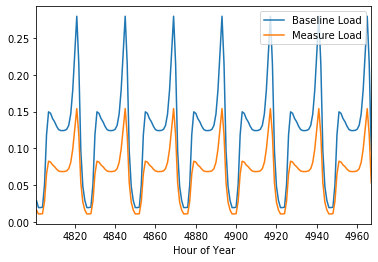

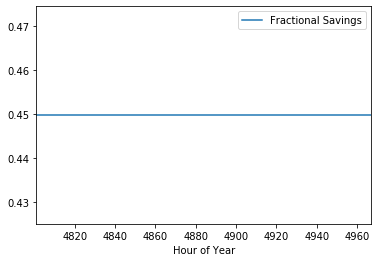

In [12]:
cz='2A'
start=200
end = start+7
sel = (bestleds['Climate Zone'] == cz) & \
      (bestleds['Hour of Year'] > start*24) & \
      (bestleds['Hour of Year'] < end*24)
ax1=bestleds.loc[sel].plot(x='Hour of Year', y=['Baseline Load', 'Measure Load'])
ax2=bestleds.loc[sel].plot(x='Hour of Year', y='Fractional Savings')

In [13]:
bestenv = pd.read_csv(os.path.join(data_dir,'Best envelope_P1d.csv'))
bestenv['Fractional Savings'] = ((bestenv['Baseline Load'] - bestenv['Measure Load'])/bestenv['Baseline Load'] ).round(5)
bestenv['End Use'].unique()

array(['heating', 'cooling'], dtype=object)

In [14]:

def get_sel(data, cz, start, end, eu=None):
    '''get a selection from the data based on the inputs'''
    if not eu:
        #Check that we only have one eu
        assert data['End Use'].nunique==1
    sel = (data['Climate Zone'] == cz) & \
          (data['Hour of Year'] > start*24) & \
          (data['Hour of Year'] < end*24)
    if eu: sel &= (data['End Use']==eu)
    return data.loc[sel]

def plot_pre_post(data, cz, start, end, eu=None):
    '''plot the pre/post savings from an EE savings shape file'''
    plotdata = get_sel(data,cz,start, end,eu)
    return plotdata.plot(x='Hour of Year', y=['Baseline Load', 'Measure Load'])

def plot_frac_savings(data, cz, start, end, eu=None):
    '''Plot the fractional savings from an EE savings shape file'''
    plotdata = get_sel(data,cz,start,end,eu)
    plotdata['Fractional Savings'] = ((plotdata['Baseline Load'].round(5) - plotdata['Measure Load'].round(5))/
                                      (plotdata['Baseline Load'].round(5)+1.e-5)).round(5)
    return plotdata.plot(x='Hour of Year', y='Fractional Savings')

def plot_rel_savings(data, cz, start, end, eu=None):
    '''plot the relative savings (relative to annual savings fraction) for the selection'''
    plotdata = get_sel(data,cz,start, end,eu)
    return plotdata.plot(x='Hour of Year', y='Relative Savings')

def plot_saved_energy(data, cz, start, end, eu=None):
    '''plot the relative energy saved in each hour'''
    plotdata = get_sel(data,cz,start, end, eu)
    sel2 = data['Climate Zone'] == cz
    if eu: sel2 &= data['End Use'] == eu
    plotdata['Energy Saved'] = -data.loc[sel2,'Baseline Load'].sum()*plotdata['Relative Savings']
    plotdata['Energy Saved2'] = plotdata['Baseline Load']-plotdata['Measure Load']
    return plotdata.plot(x='Hour of Year', y=['Energy Saved', 'Energy Saved2'])


C:\Users\bgerke.DOMINO0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\bgerke.DOMINO0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\bgerke.DOMINO0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

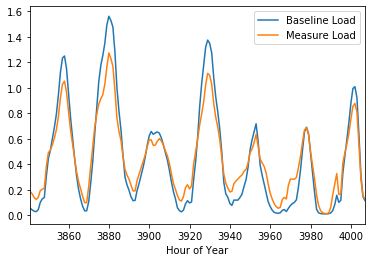

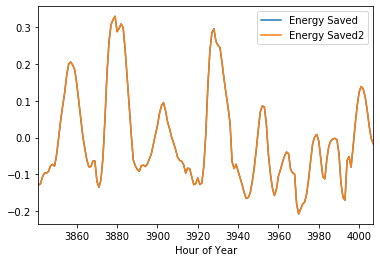

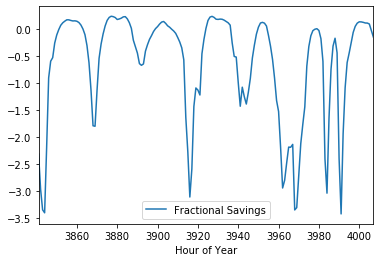

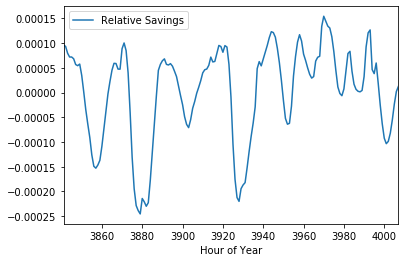

In [15]:
cz='6A'
start=160
end = start+7
eu = 'cooling'
ax1 = plot_pre_post(bestenv,cz,start,end,eu)
ax2 = plot_saved_energy(bestenv,cz,start,end,eu)
ax3 = plot_frac_savings(bestenv, cz, start, end, eu)
ax4 = plot_rel_savings(bestenv, cz, start, end, eu)
#ax2.set_ylim([-1,1])

In [54]:
sel2 = bestenv['Climate Zone'] == cz
eu='cooling'
if eu: sel2 &= bestenv['End Use'] == eu 
bestenv.loc[sel2, 'Baseline Load'].sum()

1343.6128008967223

In [17]:
bestenv.loc[sel2, 'Relative Savings'].sum()

-0.013461857045901634

In [18]:
bestenv.loc[sel2, 'Measure Load'].sum()

1325.5252774460073

In [19]:
#Look at baseline data
data_dir = "G:\Shared drives\GEB Potential Study (NREL LBNL)\Baseline Load Shapes\Residential Baseline End Use Rough Round"
files = os.listdir(data_dir)
files

['Baseline from Heterogeneity TMY 2019-06-18 18fields.csv',
 'Baseline from Heterogeneity TMY 2019-06-13.csv',
 'Baseline from Heterogeneity TMY 2019-06-03.csv',
 'Baseline from July 2019 ResStock Run.csv']

In [20]:
baseline = pd.read_csv(os.path.join(data_dir, 'Baseline from July 2019 ResStock Run.csv'))

In [121]:
import sys
import calendar
sys.path.append('..')
from loadshapes.utils.dates import create_cal_data

In [31]:
bestenv.head(10)

Hour of Year Climate Zone Building Type  End Use  Baseline Load  \
0             1           3B      SFD Home  heating       0.535565   
1             2           3B      SFD Home  heating       0.654508   
2             3           3B      SFD Home  heating       0.626739   
3             4           3B      SFD Home  heating       0.697847   
4             5           3B      SFD Home  heating       0.780081   
5             6           3B      SFD Home  heating       0.759262   
6             7           3B      SFD Home  heating       0.742852   
7             8           3B      SFD Home  heating       0.771780   
8             9           3B      SFD Home  heating       0.666988   
9            10           3B      SFD Home  heating       0.312476   

   Measure Load  Relative Savings  Fractional Savings  
0      0.010544         -0.000340             0.98031  
1      0.025616         -0.000407             0.96086  
2      0.035349         -0.000383             0.94360  
3      0.075883         -0.000402             0.89126  
4      0.130012         -0.000421             0.83334  
5      0.137197         -0.000402             0.81930  
6      0.120189         -0.000403             0.83821  
7      0.131236         -0.000414             0.82996  
8      0.128362         -0.000348             0.80755  
9      0.058555         -0.000164             0.81261

In [33]:
len(bestenv.loc[sel2])

8760

In [48]:
avg_data = create_cal_data('01-01-2006', '01-01-2007')

In [55]:
avg_data['Baseline Load'] = bestenv.loc[sel2, 'Baseline Load'].values
avg_data['Measure Load'] = bestenv.loc[sel2, 'Measure Load'].values
avg_data.head(10)

timestamp yhour  dow  dom  doy  week  month  dhour  quarter  \
0 2006-01-01 00:00:00     1    6    1    1    52      1      0        1   
1 2006-01-01 01:00:00     2    6    1    1    52      1      1        1   
2 2006-01-01 02:00:00     3    6    1    1    52      1      2        1   
3 2006-01-01 03:00:00     4    6    1    1    52      1      3        1   
4 2006-01-01 04:00:00     5    6    1    1    52      1      4        1   
5 2006-01-01 05:00:00     6    6    1    1    52      1      5        1   
6 2006-01-01 06:00:00     7    6    1    1    52      1      6        1   
7 2006-01-01 07:00:00     8    6    1    1    52      1      7        1   
8 2006-01-01 08:00:00     9    6    1    1    52      1      8        1   
9 2006-01-01 09:00:00    10    6    1    1    52      1      9        1   

   season  weekend  Baseline Load  Measure Load  
0       1        1       0.000220      0.000155  
1       1        1       0.000122      0.000085  
2       1        1       0.000119      0.000063  
3       1        1       0.000115      0.000050  
4       1        1       0.000256      0.000141  
5       1        1       0.000383      0.000362  
6       1        1       0.000438      0.000579  
7       1        1       0.000526      0.000712  
8       1        1       0.000311      0.000540  
9       1        1       0.000352      0.000641

In [62]:
avgd = avg_data.groupby(['month', 'dhour'])[['Baseline Load', 'Measure Load']].mean()

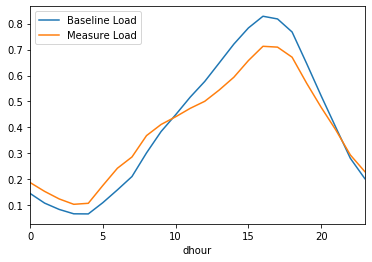

In [66]:
avgd.loc[6].plot()

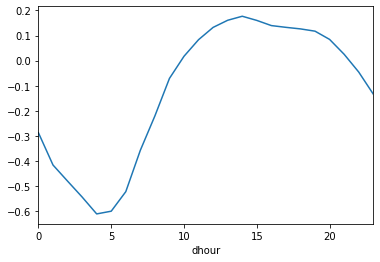

In [68]:
((avgd['Baseline Load']-avgd['Measure Load'])/avgd['Baseline Load']).loc[6].plot()

In [115]:
caldat = create_cal_data('01-01-2006', '01-01-2007')
avgdata = pd.concat([caldat]*(len(bestenv)//8760), ignore_index=True)
avgdata = pd.concat([avgdata,bestenv], axis=1)
avgdata.head(10)

timestamp yhour  dow  dom  doy  week  month  dhour  quarter  \
0 2006-01-01 00:00:00     1    6    1    1    52      1      0        1   
1 2006-01-01 01:00:00     2    6    1    1    52      1      1        1   
2 2006-01-01 02:00:00     3    6    1    1    52      1      2        1   
3 2006-01-01 03:00:00     4    6    1    1    52      1      3        1   
4 2006-01-01 04:00:00     5    6    1    1    52      1      4        1   
5 2006-01-01 05:00:00     6    6    1    1    52      1      5        1   
6 2006-01-01 06:00:00     7    6    1    1    52      1      6        1   
7 2006-01-01 07:00:00     8    6    1    1    52      1      7        1   
8 2006-01-01 08:00:00     9    6    1    1    52      1      8        1   
9 2006-01-01 09:00:00    10    6    1    1    52      1      9        1   

   season  weekend  Hour of Year Climate Zone Building Type  End Use  \
0       1        1             1           3B      SFD Home  heating   
1       1        1             2           3B      SFD Home  heating   
2       1        1             3           3B      SFD Home  heating   
3       1        1             4           3B      SFD Home  heating   
4       1        1             5           3B      SFD Home  heating   
5       1        1             6           3B      SFD Home  heating   
6       1        1             7           3B      SFD Home  heating   
7       1        1             8           3B      SFD Home  heating   
8       1        1             9           3B      SFD Home  heating   
9       1        1            10           3B      SFD Home  heating   

   Baseline Load  Measure Load  Relative Savings  Fractional Savings  
0       0.535565      0.010544         -0.000340             0.98031  
1       0.654508      0.025616         -0.000407             0.96086  
2       0.626739      0.035349         -0.000383             0.94360  
3       0.697847      0.075883         -0.000402             0.89126  
4       0.780081      0.130012         -0.000421             0.83334  
5       0.759262      0.137197         -0.000402             0.81930  
6       0.742852      0.120189         -0.000403             0.83821  
7       0.771780      0.131236         -0.000414             0.82996  
8       0.666988      0.128362         -0.000348             0.80755  
9       0.312476      0.058555         -0.000164             0.81261

In [148]:
avgd = avgdata.groupby(
    ['Climate Zone', 'Building Type', 'End Use', 'month', 'dhour'])[
        'Baseline Load', 'Measure Load', 'Fractional Savings'].mean().reset_index()
avgd['Frac Avg Savings'] = (avgd['Baseline Load']-avgd['Measure Load'])/avgd['Baseline Load']


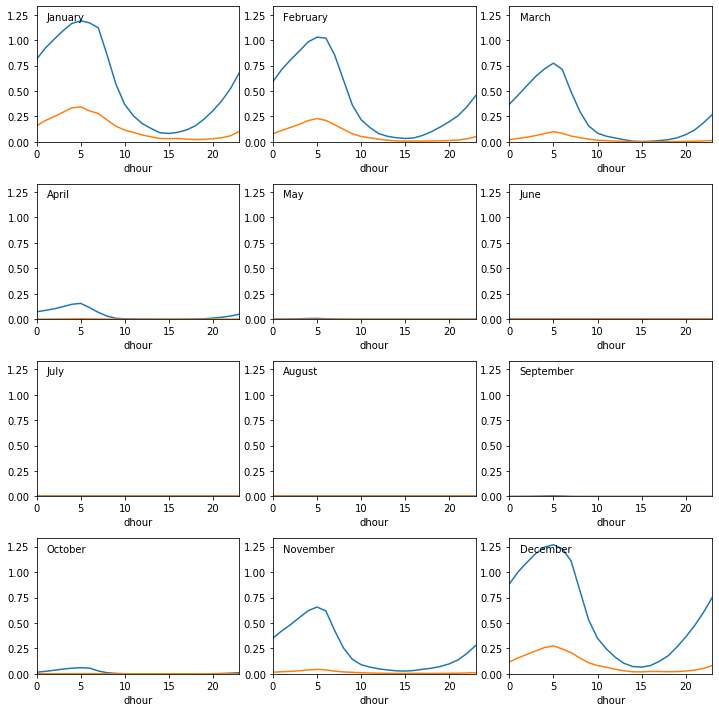

In [156]:
sel = avgd['Climate Zone']=='3B'
sel &= avgd['End Use'] == 'heating'

fig, axs = plt.subplots(4,3, figsize=[10,10])

ymax=avgd.loc[sel, ['Baseline Load', 'Measure Load']].max().max()*1.05

for m, ax in enumerate(axs.flatten()):
    selm = sel & (avgd['month']==(m+1))
    avgd.loc[selm].plot(x='dhour', y=['Baseline Load', 'Measure Load'], ax=ax, legend=False)
    ax.text(0.05,0.9,calendar.month_name[m+1],transform=ax.transAxes)
    
    ax.set_ylim([0,ymax])
    
plt.tight_layout()

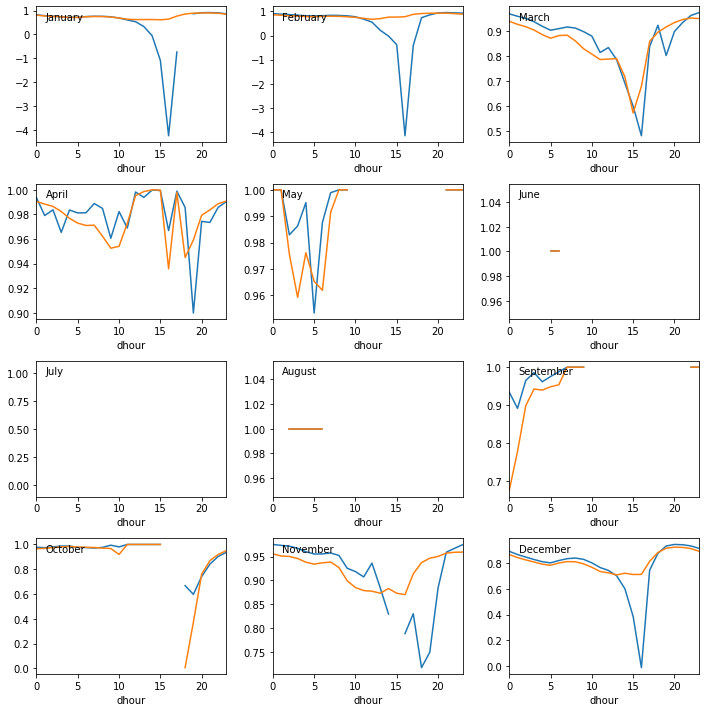

In [157]:
fig, axs = plt.subplots(4,3, figsize=[10,10])
for m, ax in enumerate(axs.flatten()):
    selm = sel & (avgd['month']==(m+1))
    avgd.loc[selm].plot(x='dhour', y=['Fractional Savings','Frac Avg Savings'], ax=ax, legend=False)
    ax.text(0.05,0.9,calendar.month_name[m+1],transform=ax.transAxes)
    
plt.tight_layout()

In [143]:
avgdata.head()

timestamp yhour  dow  dom  doy  week  month  dhour  quarter  \
0 2006-01-01 00:00:00     1    6    1    1    52      1      0        1   
1 2006-01-01 01:00:00     2    6    1    1    52      1      1        1   
2 2006-01-01 02:00:00     3    6    1    1    52      1      2        1   
3 2006-01-01 03:00:00     4    6    1    1    52      1      3        1   
4 2006-01-01 04:00:00     5    6    1    1    52      1      4        1   

   season  weekend  Hour of Year Climate Zone Building Type  End Use  \
0       1        1             1           3B      SFD Home  heating   
1       1        1             2           3B      SFD Home  heating   
2       1        1             3           3B      SFD Home  heating   
3       1        1             4           3B      SFD Home  heating   
4       1        1             5           3B      SFD Home  heating   

   Baseline Load  Measure Load  Relative Savings  Fractional Savings  
0       0.535565      0.010544         -0.000340             0.98031  
1       0.654508      0.025616         -0.000407             0.96086  
2       0.626739      0.035349         -0.000383             0.94360  
3       0.697847      0.075883         -0.000402             0.89126  
4       0.780081      0.130012         -0.000421             0.83334

In [3]:
round(0.04582312,4)

0.0458